In [82]:
import sys
sys.path.insert(0, '..')
import numpy as np
import qiskit
import qsee.state
import qsee.qcompilation
import qsee.ansatz
import qsee.constant
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
qsee.constant.MeasureMode.THEORY.value == 'theory'

True

Density 0.003710031509399414
Density 0.003145933151245117
Density 0.003103017807006836
Density 0.0032300949096679688
Density 0.002981901168823242
Density 0.0029401779174804688
Density 0.002862215042114258
Density 0.0028798580169677734
Density 0.0028600692749023438
Density 0.0028769969940185547
Density 0.0029001235961914062
Density 0.0031528472900390625
Density 0.003116130828857422
Density 0.0029680728912353516
Density 0.003801107406616211
Density 0.003381013870239258
Density 0.0028939247131347656
Density 0.002904176712036133
Density 0.003039121627807617
Density 0.002855062484741211
Density 0.002855062484741211
Density 0.002847909927368164
Density 0.0028481483459472656
Density 0.0029001235961914062
Density 0.0029833316802978516
Density 0.0029959678649902344
Density 0.0029180049896240234
Density 0.002886056900024414
Density 0.0028829574584960938
Density 0.0030450820922851562
Density 0.003033876419067383
Density 0.0028581619262695312
Density 0.0029020309448242188
Density 0.002903938293457

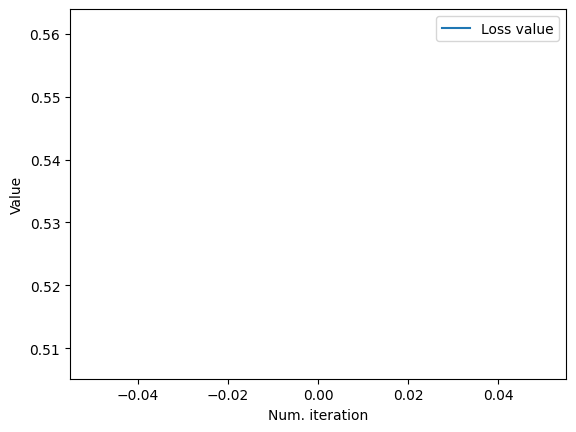

In [94]:
compiler = qsee.qcompilation.QuantumCompilation(
        u=qsee.ansatz.g2gn(3,3),
        vdagger=qsee.state.create_w_state(3).inverse(),
        optimizer='adam',
        loss_func='loss_fubini_study'
)
compiler.fit(1)
compiler.plot(metrics = [])

In [57]:
from qiskit.primitives import Sampler
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.quantum_info import SparsePauliOp

theta = ParameterVector("theta", 2)
state = QuantumCircuit(2)
state.h(0)
state.rx(theta[0], 1)
state.rx(theta[1], 1)

state.measure_all()
sampler = Sampler()

print(sampler.run(state, parameter_values=[0.2, 0.3]).result().quasi_dists)

[{0: 0.469395640472593, 1: 0.469395640472593, 2: 0.030604359527407, 3: 0.030604359527407}]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


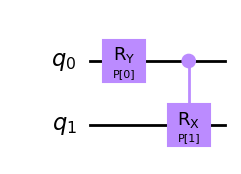

In [51]:
from qiskit.circuit import QuantumCircuit, ParameterVector

circuit = QuantumCircuit(2)
params = ParameterVector('P', 2)
circuit.ry(params[0], 0)
circuit.crx(params[1], 0, 1)

bound_circuit = circuit.assign_parameters([1, 2])
bound_circuit.draw('mpl')

circuit.draw('mpl')

In [14]:

from qiskit import qpy

theta = Parameter("theta")
phi = Parameter("phi")
sum_param = theta + phi

qc = QuantumCircuit(1)
qc.rz(theta, 0)
qc.measure_all()

with open('bell.qpy', 'wb') as fd:
    qpy.dump(qc, fd, use_symengine=True)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


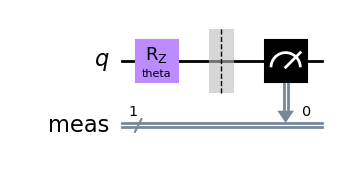

In [15]:
with open('bell.qpy', 'rb') as fd:
    new_qc = qpy.load(fd)[0]
(new_qc.draw('mpl'))

In [75]:
num_qubits = 3

if num_qubits == 2:
    qc_haar = qsee.state.specific(num_qubits,
    [ 0.73042448, -0.30956267, -0.45658101,  0.40272176])
if num_qubits == 3:
    qc_haar = qsee.state.specific(num_qubits,
    [ 0.35181542, -0.0196285,  -0.34927776,  0.08740375, -0.08942311,  0.0132403, -0.40681247, 0.75666246])

from qsee.qcompilation import QuantumCompilation

compiler = QuantumCompilation(
    [ 0.35181542, -0.0196285,  -0.34927776,  0.08740375, -0.08942311,  0.0132403, -0.40681247, 0.75666246]
)
compiler.fit()


AttributeError: 'QuantumCircuit' object has no attribute 'prepare_state'

In [61]:
compilation_fitness(circuits[i], 100) # qasm_simulator

In [66]:
compilation_fitness(circuits[i], 100) # state vector

In [73]:
import qsee.random_circuit
circuits = []
compilers = []
for i in range(0, 10):
    circuit = qsee.random_circuit.generate_with_pool(3, 4)
    circuits.append(circuit)
    compiler = compilation_fitness(circuits[i], 100)
    compilers.append(compiler)

TypeError: issubclass() arg 1 must be a class

In [58]:
fitnesses = np.empty([10, 10])

for inter in range(10, 110, 10):
    for i in range(0, 10):
        k = (np.average(compilers[i].loss_values[:inter]))
        fitnesses[int(inter/10) - 1][i] = k

In [59]:
for inter in range(10, 110, 10):
    x = fitnesses[:][int(inter/10) - 1]
    print(np.argsort(x))
    plt.plot(x)

[3 9 4 8 2 6 7 0 1 5]
[3 9 2 8 4 6 7 0 1 5]
[3 9 2 8 4 6 7 1 0 5]
[9 3 2 8 4 6 1 7 0 5]
[9 3 2 8 6 4 1 7 0 5]
[9 3 2 8 6 4 1 7 0 5]
[9 3 2 8 6 4 1 7 0 5]
[9 3 2 8 6 1 4 7 0 5]
[9 3 2 8 1 6 4 7 0 5]
[9 3 2 8 1 6 4 7 0 5]


In [3]:
from scipy.stats import kendalltau

array1 = [1, 3, 2, 4, 5]
array2 = [1, 2, 3, 4, 5]

kendall_distance, _ = kendalltau(array1, array2)
print("Kendall Tau Distance:", kendall_distance)


Kendall Tau Distance: 0.7999999999999999


In [11]:
import scipy.stats

plt.plot(range(0, 10), fitness10, marker='o', label = f'10 iters, r={np.round(scipy.stats.pearsonr(fitness10, fitness100)[0], 3)}')
plt.plot(range(0, 10), fitness20, marker='o', label = f'20 iterations, r={np.round(scipy.stats.pearsonr(fitness20, fitness100)[0], 3)}')
#plt.plot(range(0, 10), fitness30, label = f'30 iterations, r={np.round(scipy.stats.pearsonr(fitness30, fitness100)[0], 3)}')
plt.plot(range(0, 10), fitness40, marker='o', label = f'40 iterations, r={np.round(scipy.stats.pearsonr(fitness40, fitness100)[0], 3)}')
#plt.plot(range(0, 10), fitness50, label = f'50 iterations, r={np.round(scipy.stats.pearsonr(fitness50, fitness100)[0], 3)}')
plt.plot(range(0, 10), fitness60, marker='o', label = f'60 iterations, r={np.round(scipy.stats.pearsonr(fitness60, fitness100)[0], 3)}')
#plt.plot(range(0, 10), fitness70, label = f'70 iterations, r={np.round(scipy.stats.pearsonr(fitness70, fitness100)[0], 3)}')
plt.plot(range(0, 10), fitness80, marker='o', label = f'80 iterations, r={np.round(scipy.stats.pearsonr(fitness80, fitness100)[0], 3)}')
#plt.plot(range(0, 10), fitness90, label = f'90 iterations, r={np.round(scipy.stats.pearsonr(fitness90, fitness100)[0], 3)}')
plt.plot(range(0, 10), fitness100, marker='o', label = f'100 iterations, r={np.round(scipy.stats.pearsonr(fitness100, fitness100)[0], 3)}')
plt.xticks(range(0, 10), indexx)
plt.xlabel('Circuit ID')
plt.ylabel('Cost value')
plt.legend()
plt.savefig(fname = 'pearsonr.pdf', dpi = 1000)